In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

In [4]:
df=pd.read_csv("/Users/venka/OneDrive/Desktop/Data science course/ML/credit.csv")

In [5]:
df

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,12,good,furniture/appliances,1736,< 100 DM,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
996,< 0 DM,30,good,car,3857,< 100 DM,1 - 4 years,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,furniture/appliances,804,< 100 DM,> 7 years,4,4,38,none,own,1,skilled,1,no,no
998,< 0 DM,45,good,furniture/appliances,1845,< 100 DM,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

- In this dataset there is no null values.
- Target column is Default

# Analysing Catogorical columns

In [7]:
print("checking_balance",df.checking_balance.value_counts())
print("credit_history",df.credit_history.value_counts())
print("purpose",df.purpose.value_counts())
print("savings_balance",df["savings_balance"].value_counts())
print("employment_duration",df["employment_duration"].value_counts())
print("other_credit",df["other_credit"].value_counts())
print("housing",df["housing"].value_counts())
print("job",df["job"].value_counts())
print("phone",df["phone"].value_counts())
print("default",df["default"].value_counts())

checking_balance checking_balance
unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: count, dtype: int64
credit_history credit_history
good         530
critical     293
poor          88
very good     49
perfect       40
Name: count, dtype: int64
purpose purpose
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: count, dtype: int64
savings_balance savings_balance
< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: count, dtype: int64
employment_duration employment_duration
1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: count, dtype: int64
other_credit other_credit
none     814
bank     139
store     47
Name: count, dtype: int64
housing housing
own      713
rent     179
other    108
Name: count, dtype: int64
job job
skilled      

In [8]:
df["purpose"].value_counts()

purpose
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: count, dtype: int64

- Car and Car0 are same. We need to merge these categories in purpose column.

- Replacing car0 as car in purpose column

In [9]:
df["purpose"].replace("car0","car",inplace=True)

In [10]:
df["purpose"].value_counts()

purpose
furniture/appliances    473
car                     349
business                 97
education                59
renovations              22
Name: count, dtype: int64

- We can rank these columns(checking_balance,credit_history,savings_balance,employment_duration,phone,default)
- We can use onehot coding for remaning columns(purpose,other_credit,housing,job)

In [11]:
replacestruct={ "checking_balance":{"< 0 DM": 1,"1 - 200 DM": 2,"> 200 DM": 3,"unknown": 0},
                "credit_history":{"critical": 1, "poor": 2, "good": 3, "very good": 4, "perfect": 5},
                "savings_balance" :{"< 100 DM": 1,"100 - 500 DM": 2,"500 - 1000 DM": 3, "> 1000 DM": 4,"unknown": 0},
                "employment_duration": {"unemployed": 1, "< 1 year": 2, "1 - 4 years": 3, "4 - 7 years": 4, "> 7 years": 5},
                "phone" :{"no": 0, "yes":1},
                "default" :{"no": 0,"yes": 1}
}
onehot=["purpose", "other_credit", "housing", "job"]

In [12]:
df=df.replace(replacestruct)
df=pd.get_dummies(df,columns=onehot,dtype=int)
df

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled
0,1,6,1,1169,0,5,4,4,67,2,...,0,1,0,0,1,0,0,1,0,0
1,2,48,3,5951,1,3,2,2,22,1,...,0,1,0,0,1,0,0,1,0,0
2,0,12,1,2096,1,4,2,3,49,1,...,0,1,0,0,1,0,0,0,0,1
3,1,42,3,7882,1,4,2,4,45,1,...,0,1,0,1,0,0,0,1,0,0
4,1,24,2,4870,1,3,3,4,53,2,...,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,12,3,1736,1,4,3,4,31,1,...,0,1,0,0,1,0,0,0,0,1
996,1,30,3,3857,1,3,4,4,40,1,...,0,1,0,0,1,0,1,0,0,0
997,0,12,3,804,1,5,4,4,38,1,...,0,1,0,0,1,0,0,1,0,0
998,1,45,3,1845,1,3,4,4,23,1,...,0,1,0,1,0,0,0,1,0,0


In [13]:
df.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'amount',
       'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'existing_loans_count', 'dependents',
       'phone', 'default', 'purpose_business', 'purpose_car',
       'purpose_education', 'purpose_furniture/appliances',
       'purpose_renovations', 'other_credit_bank', 'other_credit_none',
       'other_credit_store', 'housing_other', 'housing_own', 'housing_rent',
       'job_management', 'job_skilled', 'job_unemployed', 'job_unskilled'],
      dtype='object')

# Splliting the data in X and y 

In [14]:
X=df.drop("default",axis=1)
y=df["default"]

In [15]:
X

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled
0,1,6,1,1169,0,5,4,4,67,2,...,0,1,0,0,1,0,0,1,0,0
1,2,48,3,5951,1,3,2,2,22,1,...,0,1,0,0,1,0,0,1,0,0
2,0,12,1,2096,1,4,2,3,49,1,...,0,1,0,0,1,0,0,0,0,1
3,1,42,3,7882,1,4,2,4,45,1,...,0,1,0,1,0,0,0,1,0,0
4,1,24,2,4870,1,3,3,4,53,2,...,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,12,3,1736,1,4,3,4,31,1,...,0,1,0,0,1,0,0,0,0,1
996,1,30,3,3857,1,3,4,4,40,1,...,0,1,0,0,1,0,1,0,0,0
997,0,12,3,804,1,5,4,4,38,1,...,0,1,0,0,1,0,0,1,0,0
998,1,45,3,1845,1,3,4,4,23,1,...,0,1,0,1,0,0,0,1,0,0


In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7894)

### Building the model

In [21]:
model=DecisionTreeClassifier(criterion='gini',random_state=654656)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=654656)

# Score of our model

In [22]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

1.0
0.725


- Overfitting : train score is 100% and test score is less than train
- underfitting : Test is more than train
- Noraml : Both train and test are similar 

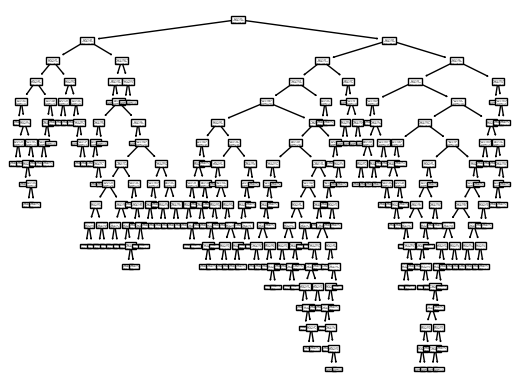

In [37]:
tree.plot_tree(model);

In [38]:
df.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'amount',
       'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'existing_loans_count', 'dependents',
       'phone', 'default', 'purpose_business', 'purpose_car',
       'purpose_education', 'purpose_furniture/appliances',
       'purpose_renovations', 'other_credit_bank', 'other_credit_none',
       'other_credit_store', 'housing_other', 'housing_own', 'housing_rent',
       'job_management', 'job_skilled', 'job_unemployed', 'job_unskilled'],
      dtype='object')

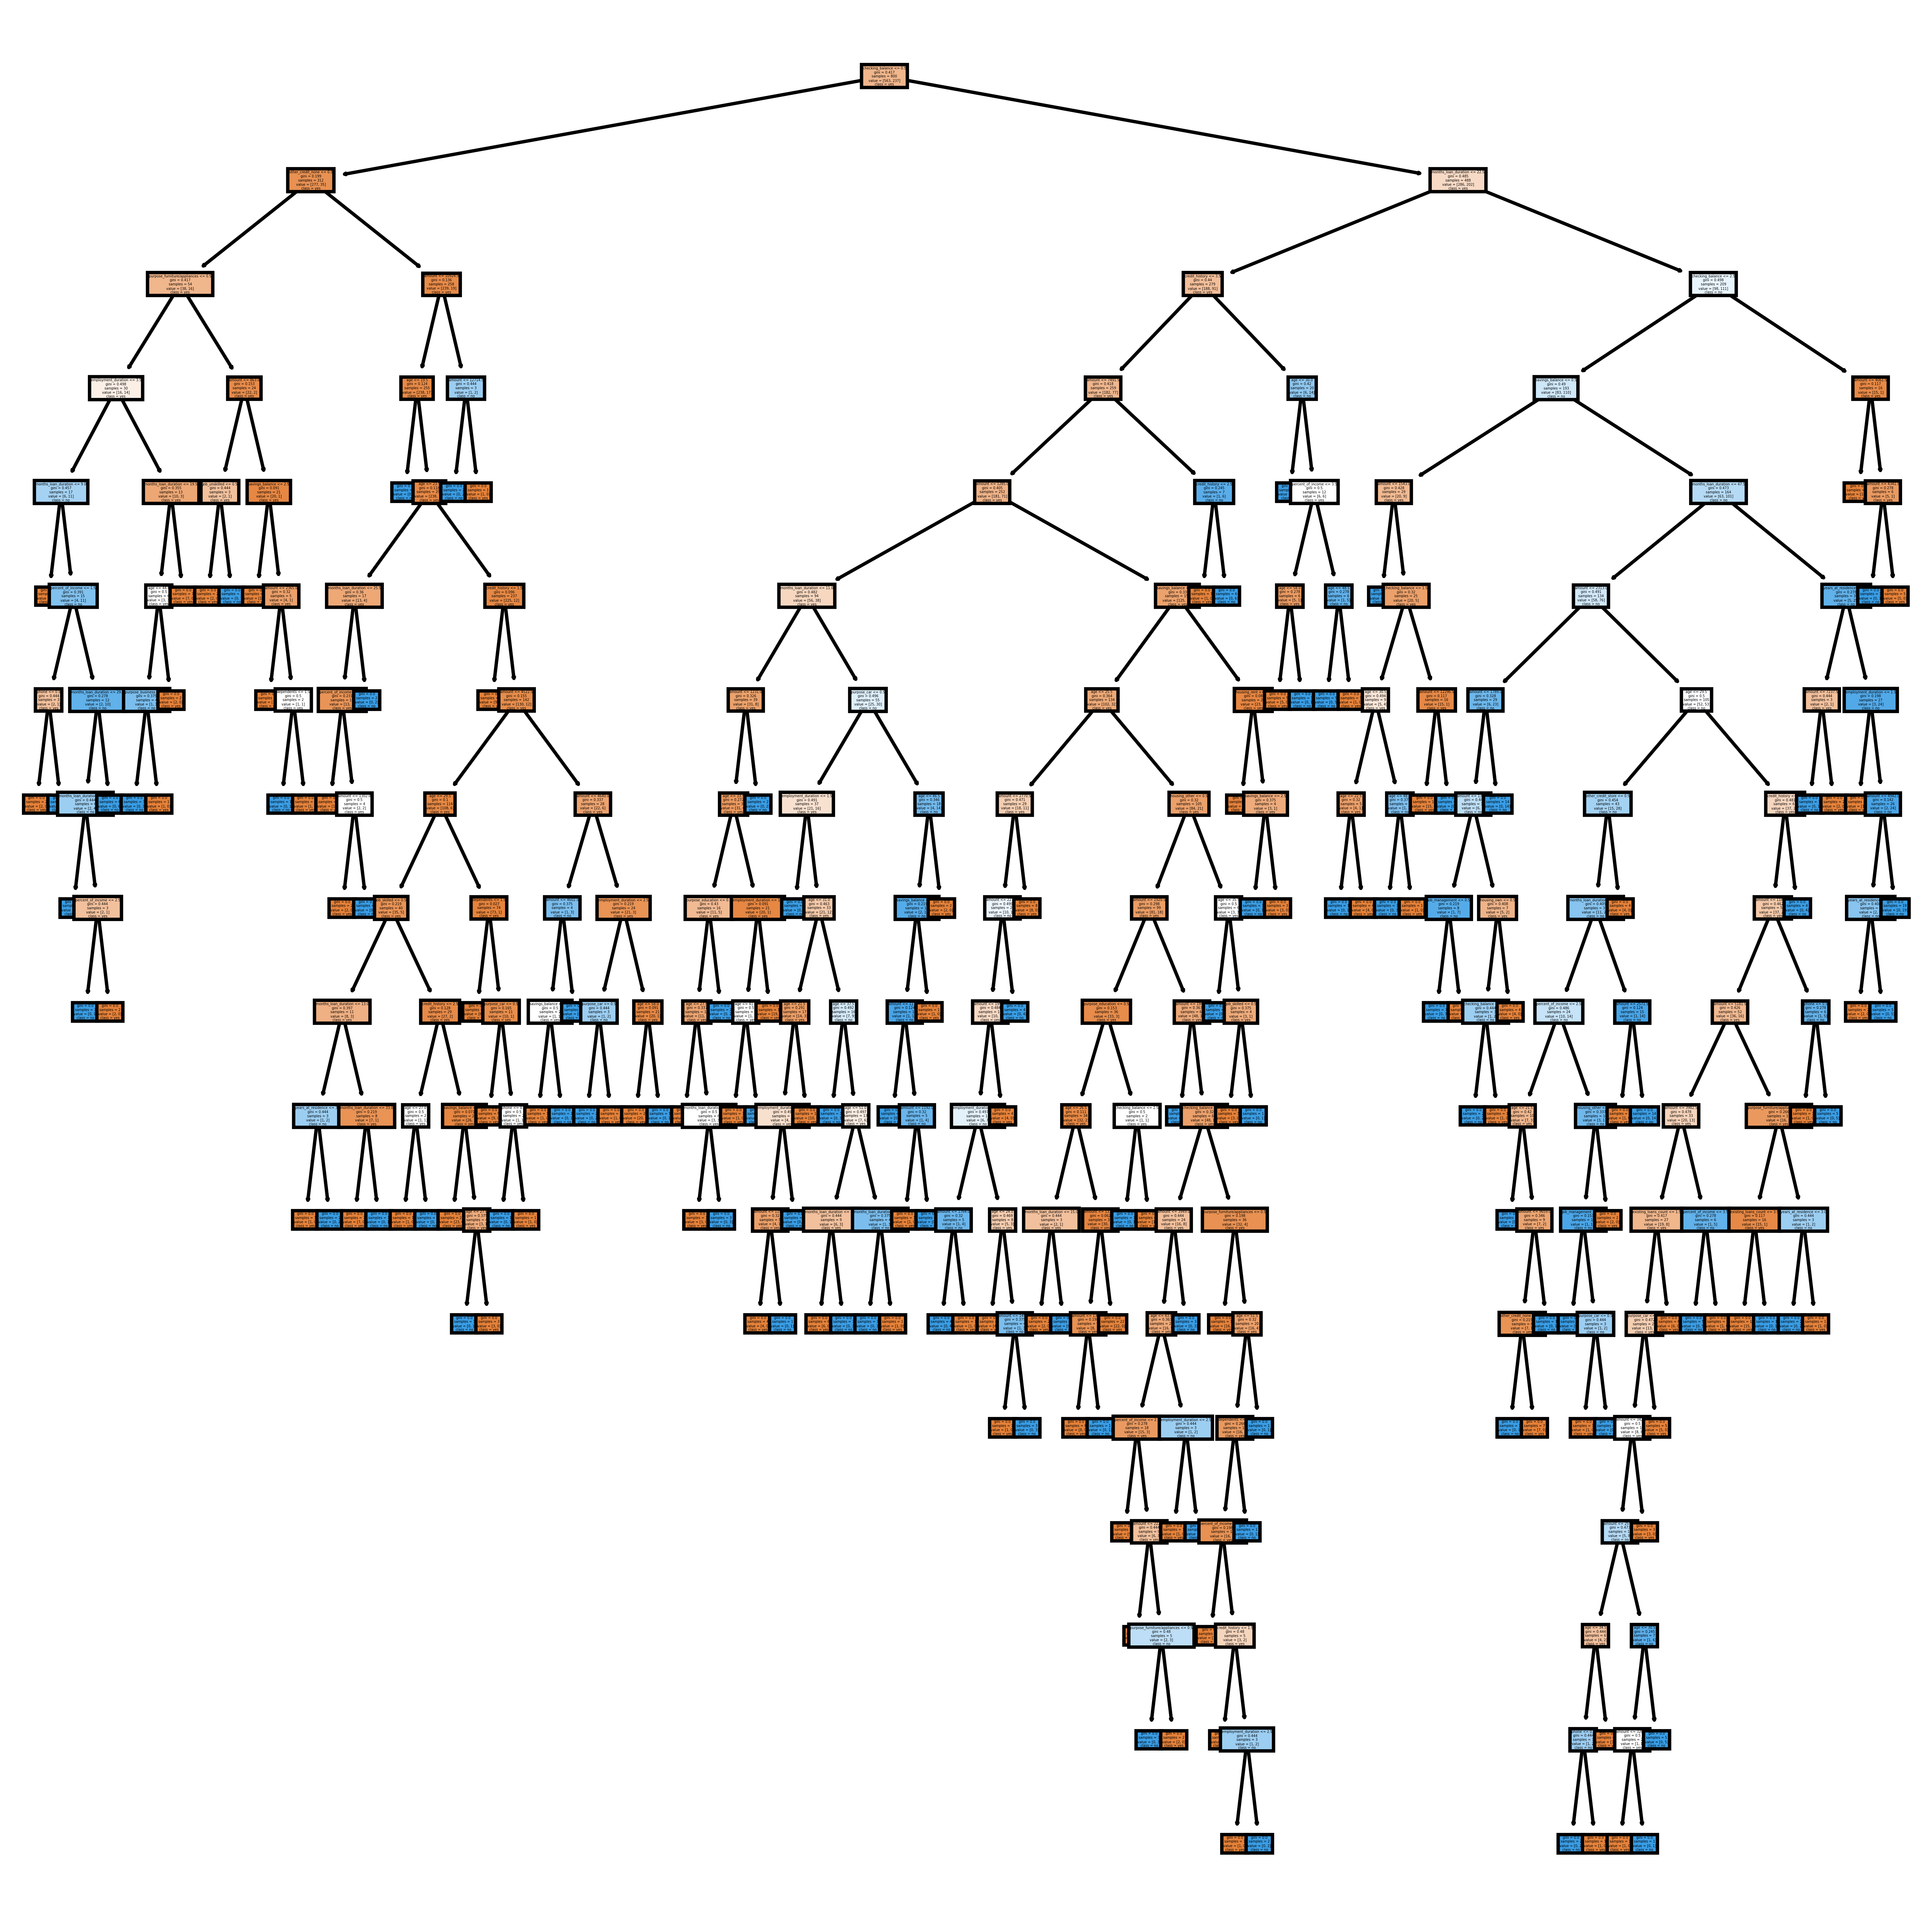

In [51]:
fn=['checking_balance', 'months_loan_duration', 'credit_history', 'amount',
       'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'existing_loans_count', 'dependents',
       'phone','purpose_business', 'purpose_car',
       'purpose_education', 'purpose_furniture/appliances',
       'purpose_renovations', 'other_credit_bank', 'other_credit_none',
       'other_credit_store', 'housing_other', 'housing_own', 'housing_rent',
       'job_management', 'job_skilled', 'job_unemployed', 'job_unskilled']
cn=['yes','no']
fig,axes=plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=700)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

# Reducing overfitting 

- Reducing can be done by cutting the depth of tree size

In [52]:
model=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=654656)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=654656)

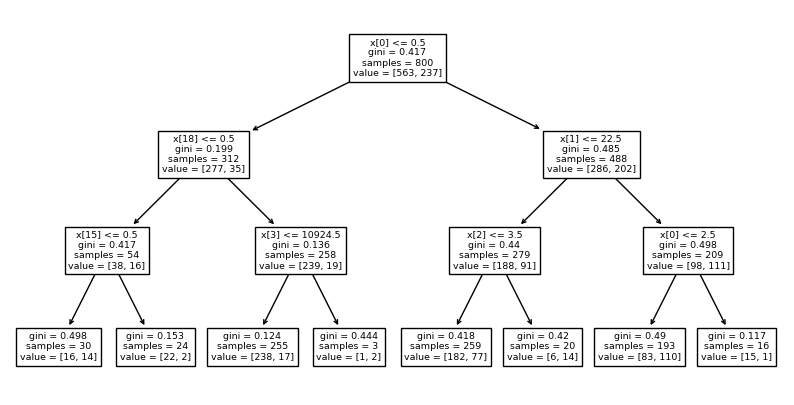

In [78]:
plt.figure(figsize = (10,5))
tree.plot_tree(model);

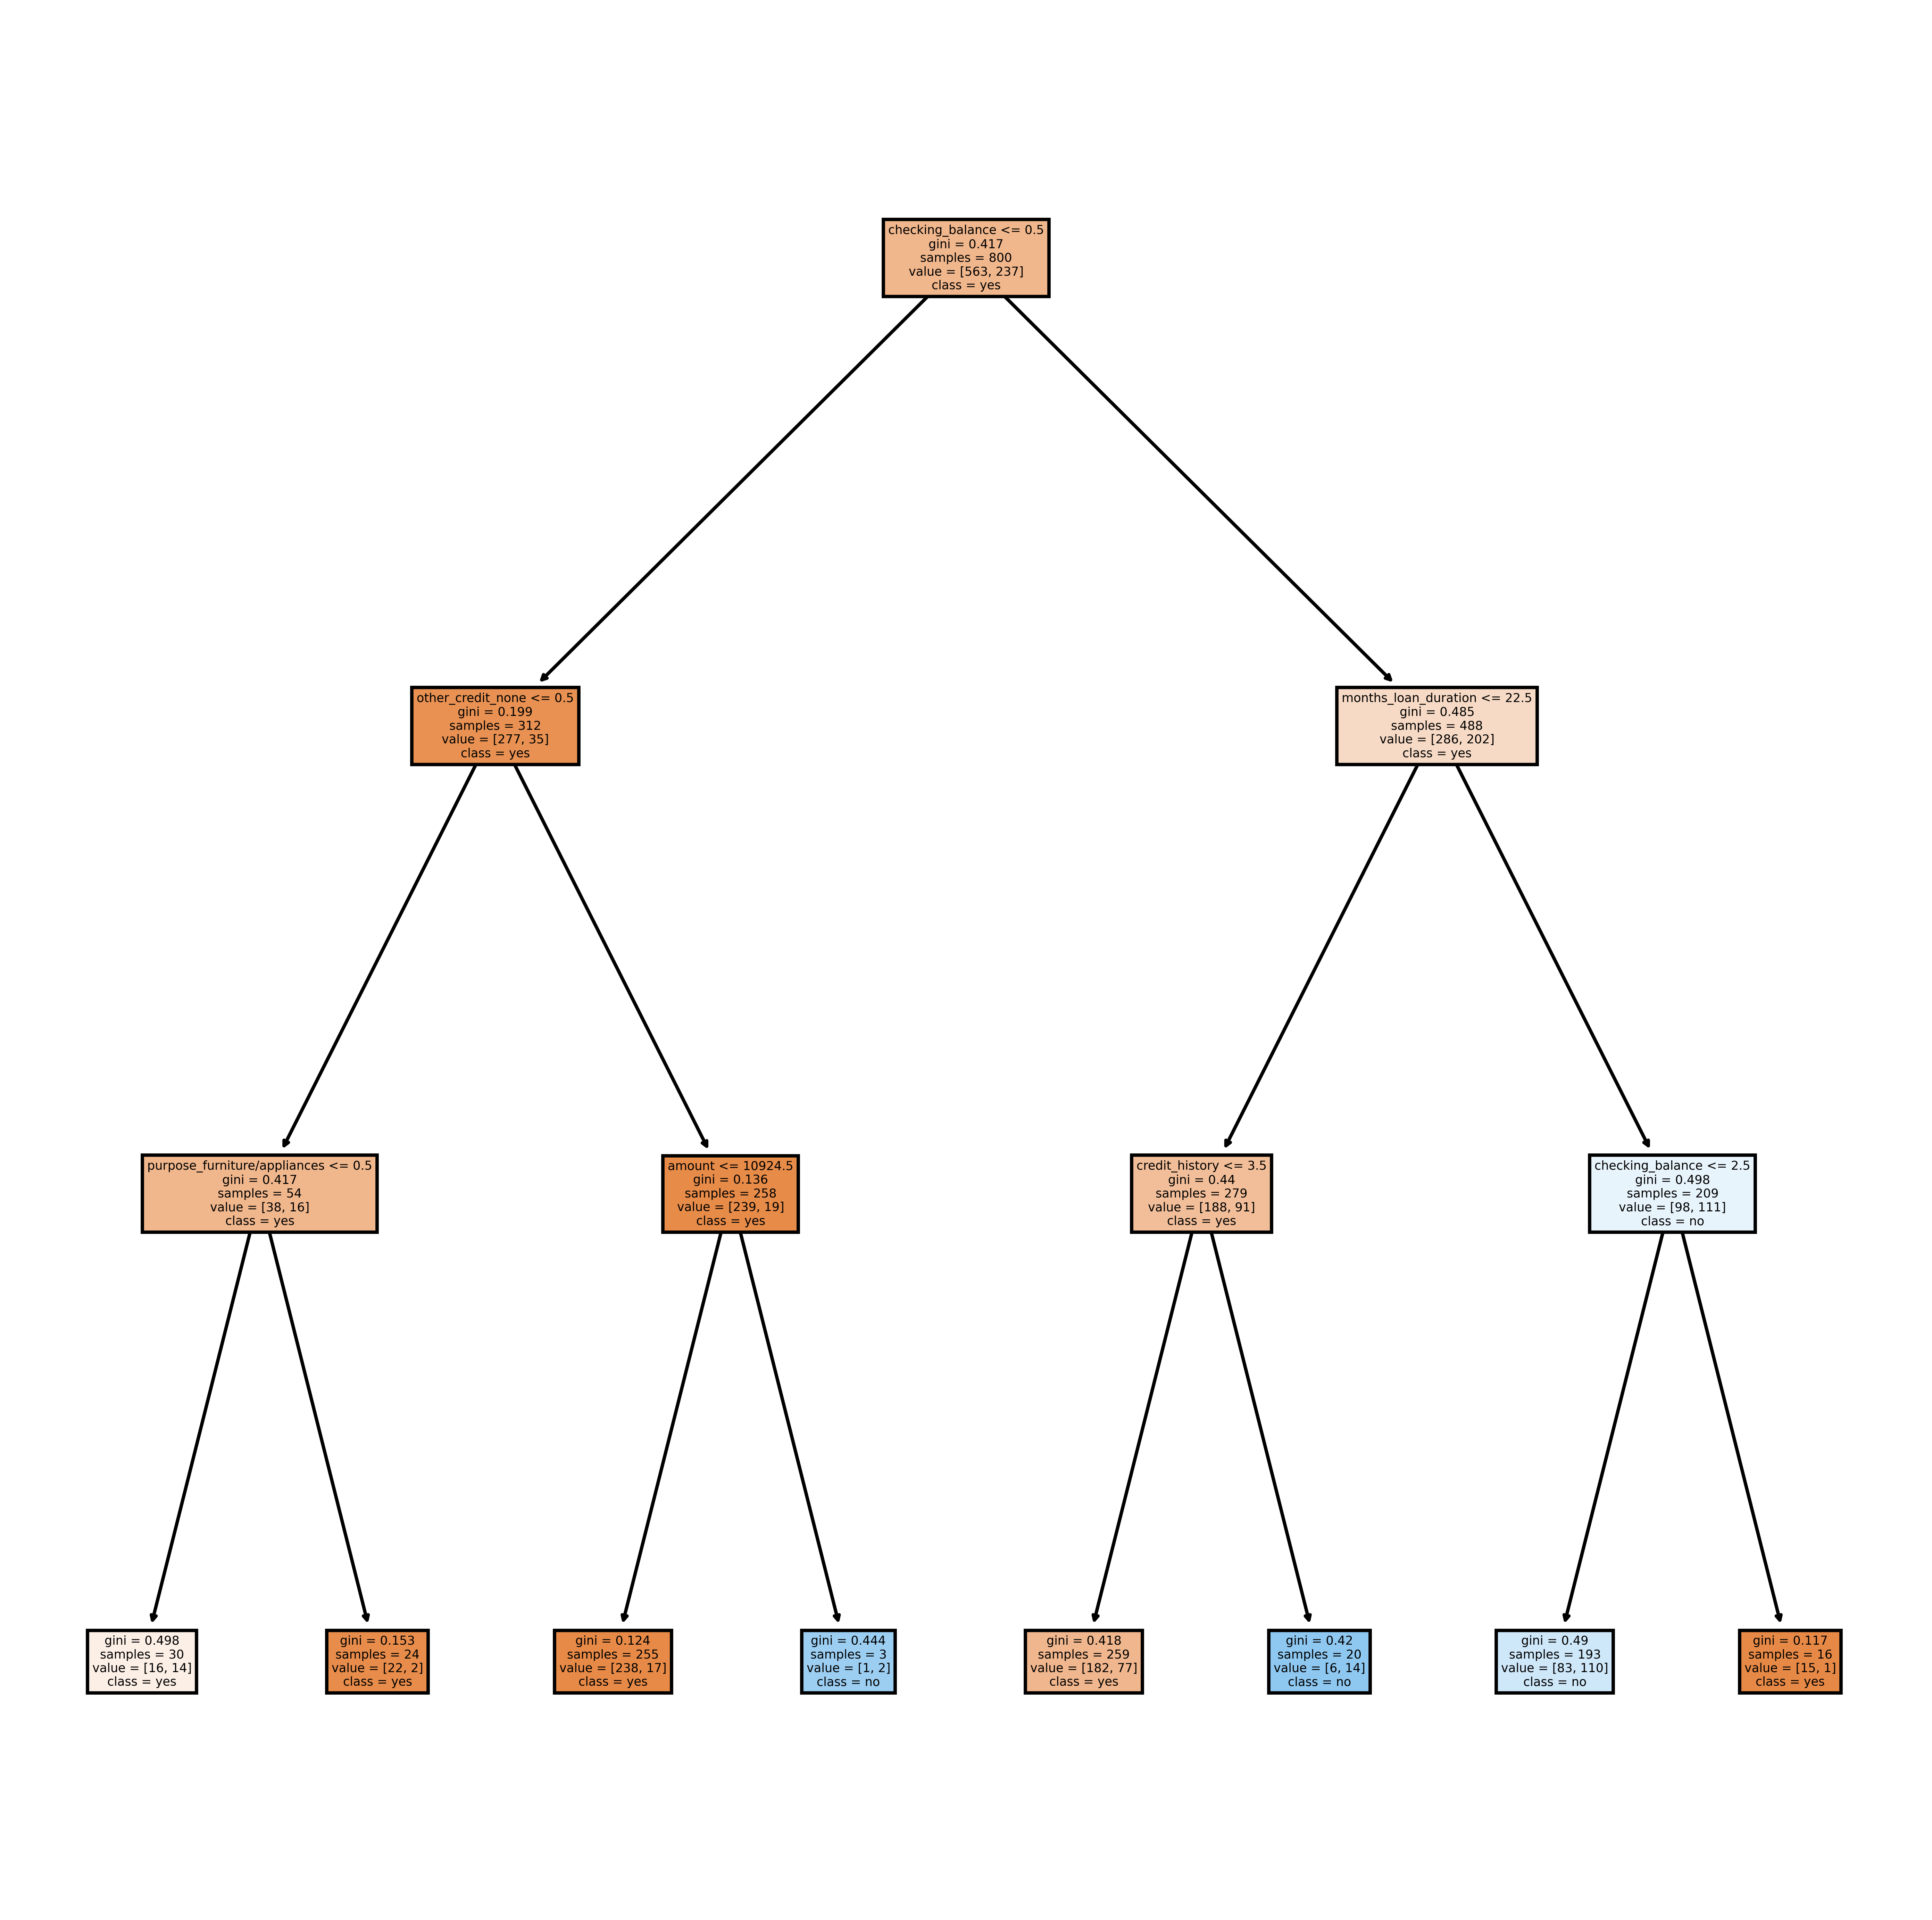

In [79]:
fn=['checking_balance', 'months_loan_duration', 'credit_history', 'amount',
       'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'existing_loans_count', 'dependents',
       'phone','purpose_business', 'purpose_car',
       'purpose_education', 'purpose_furniture/appliances',
       'purpose_renovations', 'other_credit_bank', 'other_credit_none',
       'other_credit_store', 'housing_other', 'housing_own', 'housing_rent',
       'job_management', 'job_skilled', 'job_unemployed', 'job_unskilled']
cn=['yes','no']
fig,axes=plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=700)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [53]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.74875
0.725


### Predecting on test data

In [80]:
y_pred_train=model.predict(X_train)
y_pred=model.predict(X_test)
pd.Series(y_pred).value_counts()

0    142
1     58
Name: count, dtype: int64

In [59]:
y_test.value_counts()

default
0    137
1     63
Name: count, dtype: int64

In [72]:
rt=pd.crosstab(y_test,y_pred)
rt

col_0,0,1
default,,
0,112,25
1,30,33


0.725


<Axes: >

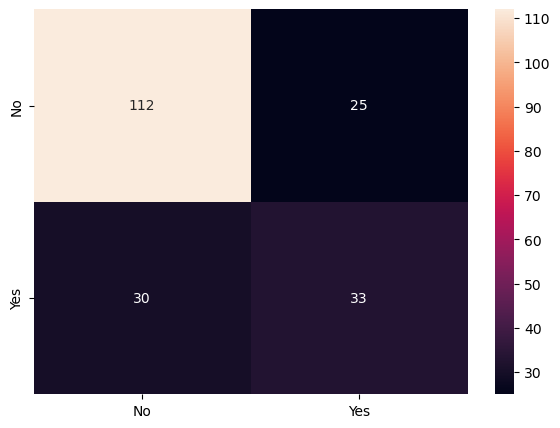

In [70]:
print(model.score(X_test , y_test))
y_predict = model.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


<Axes: xlabel='col_0', ylabel='default'>

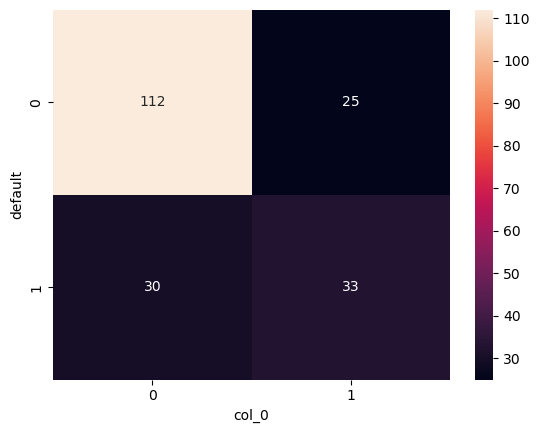

In [75]:
sns.heatmap(rt,annot=True,fmt='g')

In [82]:
from sklearn.metrics import confusion_matrix
print("Training_confusion_matrix : ",confusion_matrix(y_test,y_pred))

Training_confusion_matrix :  [[112  25]
 [ 30  33]]
